# Projet 2 : Analysez des données de systèmes éducatifs
Date début : 02/10/2024

## Importation des librairies utiles

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Importation des données

### Définition des chemins et fichiers et direction de l'espace de travail

In [2]:
data_folder = "D:/GoogleDrive/Mon Drive/formations/OpenClassrooms/P2/"
file_prefix = "EdStats"
file_sufix = ".csv"
os.chdir(os.path.dirname(data_folder))

### Lecture des 5 fichiers csv

In [3]:
data = pd.read_csv(file_prefix+"Data"+file_sufix, encoding = 'utf-8-sig')
country = pd.read_csv(file_prefix+"Country"+file_sufix, encoding = 'utf-8-sig')
series = pd.read_csv(file_prefix+"Series"+file_sufix, encoding = 'utf-8-sig')
country_series = pd.read_csv(file_prefix+"Country-Series"+file_sufix, encoding = 'utf-8-sig')
footNote = pd.read_csv(file_prefix+"FootNote"+file_sufix, encoding = 'utf-8-sig')

### Traitement des colonnes

#### Liste des colonnes avant traitement

In [4]:
print("data : ")
print(data.columns)
print("country : ")
print(country.columns)
print("series : ")
print(series.columns)
print("country_series : ")
print(country_series.columns)
print("footNote : ")
print(footNote.columns)

data : 
Index(['"Country Name"', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')
country : 
Index(['"Country Code"', 'Short Name', 'Table Name', 'Long Name',
       '2-alpha code', 'Currency Unit', 'Special Notes', 'Region',
       'Income Group', 'WB-2 code', 'National accounts base year',
       'National accounts reference year', 'SNA price valuation',
       'Lending category

#### Conversion des noms de colonnes pour supprimer les guillemets

In [5]:
data.columns = data.columns.str.replace('\"', '')
country.columns = country.columns.str.replace('\"', '')
series.columns = series.columns.str.replace('\"', '')
country_series.columns = country_series.columns.str.replace('\"', '')
footNote.columns = footNote.columns.str.replace('\"', '')

#### Suppression des dernières colonnes "unnamed"

In [6]:
data = data.iloc[:,:-1]
country = country.iloc[:,:-1]
series = series.iloc[:,:-1]
country_series = country_series.iloc[:,:-1]
footNote = footNote.iloc[:,:-1]

#### Liste des colonnes après traitement

In [7]:
print("data : ")
print(data.columns)
print("country : ")
print(country.columns)
print("series : ")
print(series.columns)
print("country_series : ")
print(country_series.columns)
print("footNote : ")
print(footNote.columns)

data : 
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')
country : 
Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       

## Premier aperçu des données

### Dimensions

In [8]:
data_dim = data.shape
country_dim = country.shape
series_dim = series.shape
country_series_dim = country_series.shape
footNote_dim = footNote.shape

print("Dimension du dataframe data : lignes %i, colonnes %i" %(data_dim[0], data_dim[1]))
print("Dimension du dataframe country : lignes %i, colonnes %i" %(country_dim[0], country_dim[1]))
print("Dimension du dataframe series : lignes %i, colonnes %i" %(series_dim[0], series_dim[1]))
print("Dimension du dataframe country_series : lignes %i, colonnes %i" %(country_series_dim[0], country_series_dim[1]))
print("Dimension du dataframe footNote : lignes %i, colonnes %i" %(footNote_dim[0], footNote_dim[1]))

Dimension du dataframe data : lignes 886930, colonnes 69
Dimension du dataframe country : lignes 241, colonnes 31
Dimension du dataframe series : lignes 3665, colonnes 20
Dimension du dataframe country_series : lignes 613, colonnes 3
Dimension du dataframe footNote : lignes 643638, colonnes 4


In [9]:
data.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype

In [10]:
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [11]:
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
dtype: object

In [12]:
country_series.dtypes

CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

In [13]:
footNote.dtypes

CountryCode    object
SeriesCode     object
Year           object
DESCRIPTION    object
dtype: object

### VIsualisation des premières (et éventuellement dernières) lignes

#### Data

In [14]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Country

In [16]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


#### Series

In [17]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN


#### Country_series

In [18]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


#### FootNote

In [19]:
footNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


## Analyse de la qualité des DataFrame

### Valeurs manquantes

In [20]:
data.isnull().sum()[0:4]

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
dtype: int64

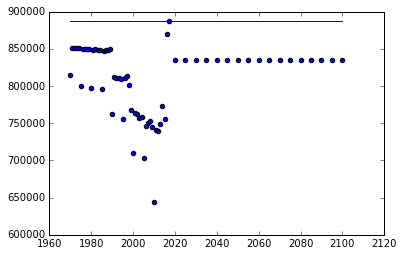

In [21]:
data_isnull = data.isnull().sum()
data_isnull_year = np.zeros((data_dim[1]-4, 2))
data_isnull_year[:,0] = [int(numeric_string) for numeric_string in data_isnull.index[4:].values]
data_isnull_year[:,1] = data_isnull[4:]
plt.scatter(data_isnull_year[:,0], data_isnull_year[:,1])
plt.plot(data_isnull_year[:,0], data_dim[0]*np.ones(((data_dim[1]-4,1))))
plt.show()

In [22]:
print("Nombre de lignes du dataframe series : %i"%series_dim[0])
series.isnull().sum()[series.isnull().sum().values > 3500]

Nombre de lignes du dataframe series : 3665


Unit of measure                        3665
Periodicity                            3566
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Statistical concept and methodology    3642
Development relevance                  3662
Other web links                        3665
Related indicators                     3665
License Type                           3665
dtype: int64

In [23]:
series = series.drop(
    ['Unit of measure', 'Notes from original source', 'Other web links', 'Related indicators', 'License Type'],
    axis=1)
series_dim = series.shape

In [24]:
country_series.isnull().sum()

CountryCode    0
SeriesCode     0
DESCRIPTION    0
dtype: int64

In [25]:
footNote.isnull().sum()

CountryCode    0
SeriesCode     0
Year           0
DESCRIPTION    0
dtype: int64

### Étude de la répartition de données par estimateurs (et sélection)

In [26]:
data['nb_val'] = data.apply(lambda row:len(row[4:])-row[4:].isnull().sum(), axis = 1)

In [27]:
series['nb_val_tot'] = series.apply(lambda row:data.loc[data['Indicator Code'] == row[0], 'nb_val'].sum(), axis=1)

In [28]:
series['nb_country'] = series.apply(lambda row:len(data.loc[(data['Indicator Code'] == row[0])&(data['nb_val']>0)]), axis=1)

In [29]:
series['nb_val_mean'] = series.apply(lambda row:data.loc[(data['Indicator Code'] == row[0])&(data['nb_val']>0), 'nb_val'].mean(), axis=1)

In [30]:
series['nb_val_max'] = series.apply(lambda row:data.loc[(data['Indicator Code'] == row[0])&(data['nb_val']>0), 'nb_val'].max(), axis=1)

In [31]:
series['nb_val_std'] = series.apply(lambda row:data.loc[(data['Indicator Code'] == row[0])&(data['nb_val']>0), 'nb_val'].std(), axis=1)

In [32]:
series['nb_val_min'] = series.apply(lambda row:data.loc[(data['Indicator Code'] == row[0])&(data['nb_val']>0), 'nb_val'].min(), axis=1)

In [33]:
series['nb_val_q1'] = series.apply(lambda row:data.loc[(data['Indicator Code'] == row[0])&(data['nb_val']>0), 'nb_val'].quantile(0.25), axis=1)

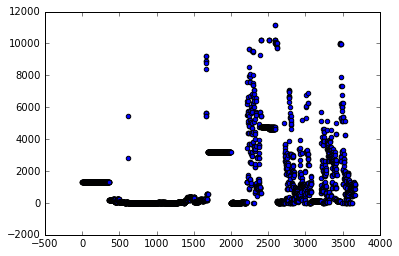

In [34]:
plt.scatter(series.index.values, series['nb_val_tot'])

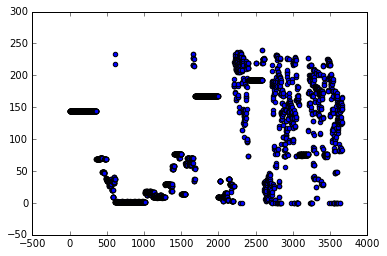

In [35]:
plt.scatter(series.index.values, series['nb_country'])

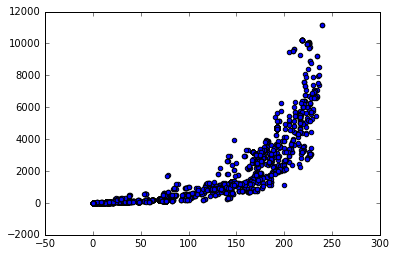

In [36]:
plt.scatter(series['nb_country'], series['nb_val_tot'])

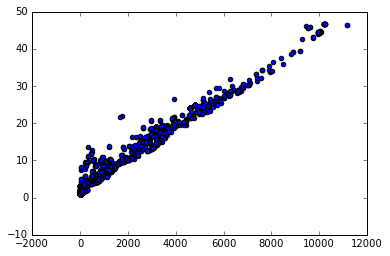

In [37]:
plt.scatter(series['nb_val_tot'], series['nb_val_mean'])

In [38]:
series_topic = pd.DataFrame({'Topic' : series['Topic'].value_counts().index.values, 'Value_count' : series['Topic'].value_counts().values})
series_topic['nb_country_max'] = series_topic.apply(lambda row:series.loc[series['Topic'] == row[0], 'nb_country'].max(), axis=1)
series_topic['nb_val_mean_max'] = series_topic.apply(lambda row:series.loc[series['Topic'] == row[0], 'nb_val_mean'].max(), axis=1)

In [39]:
def plot_series_stat(series_df, column_id, columns_plot_array, vline_values_array):
    Y_pos = np.arange(len(series_df))
    colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
    i = 0
    for string in columns_plot_array:
        plt.scatter(series_df[string], Y_pos, color=colors[i], label=string)
        i = i+1
    plt.yticks(Y_pos, series_df[column_id])
    for x in vline_values_array:
        plt.plot(x*np.ones(((len(series_df),1))), Y_pos)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(columns_plot_array))
    plt.grid()
    plt.show()

In [40]:
def plot_series_country(series_df, columns_plot_array):
    colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
    i = 0
    for string in columns_plot_array:
        plt.scatter(series_df['nb_country'], series_df[string], color=colors[i], label=string)
        i = i+1
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(columns_plot_array))
    plt.grid()
    plt.show()

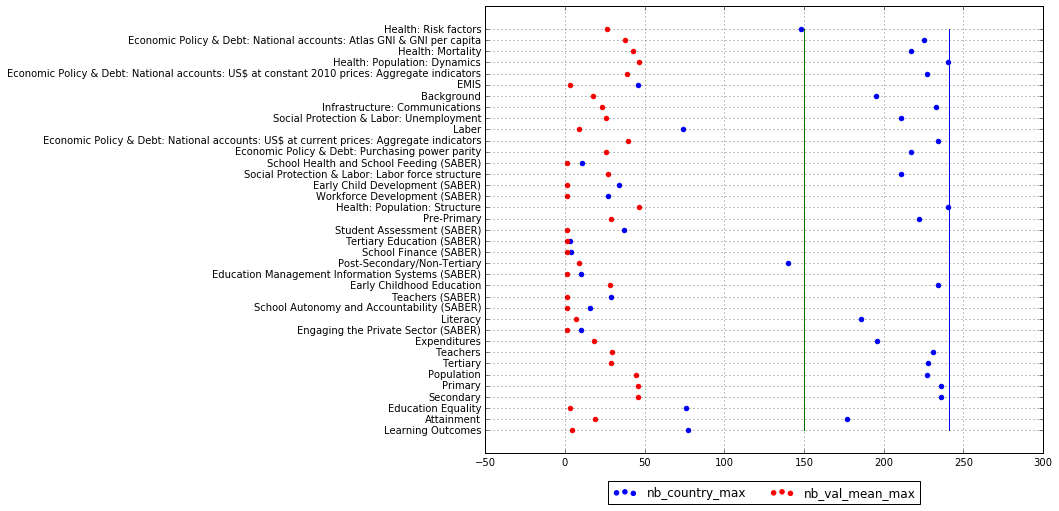

In [41]:
plt.figure(figsize=(10,8))
plot_series_stat(series_topic, 'Topic', ['nb_country_max','nb_val_mean_max'], [country_dim[0], 150])

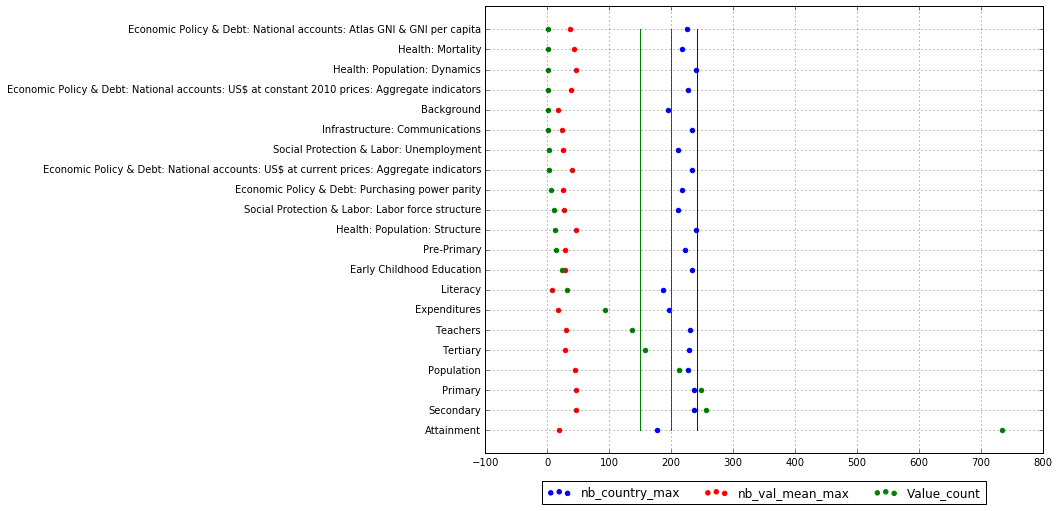

In [42]:
series_topic150 = series_topic.loc[series_topic['nb_country_max'] >= 150]
plt.figure(figsize=(10,8))
plot_series_stat(series_topic150, 'Topic', ['nb_country_max','nb_val_mean_max', 'Value_count'], [country_dim[0], 150, 200])

## Secondary (3)

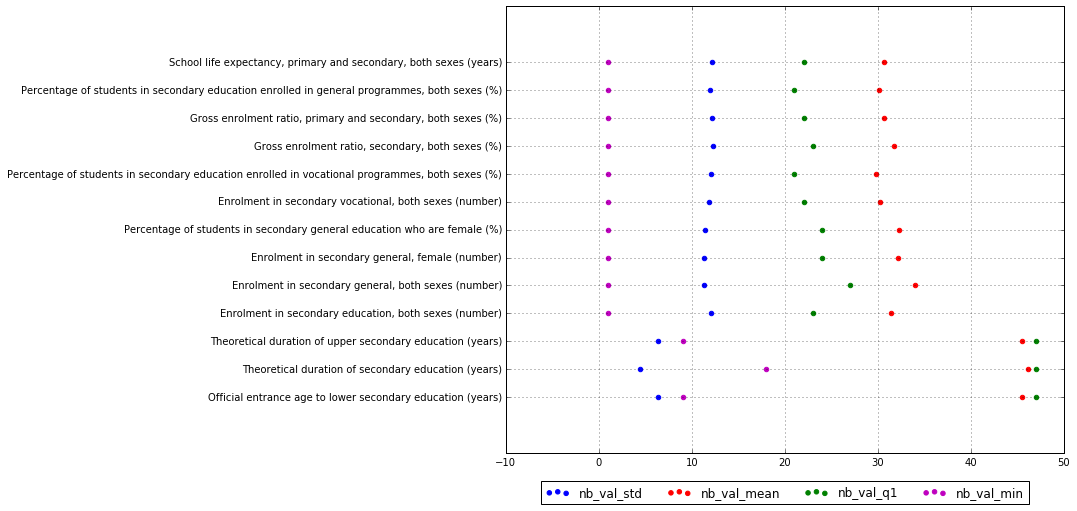

In [43]:
series_filter = series.loc[(series['nb_val_q1']>20)
           &(series['nb_country']>200)
           &(series['Topic']=="Secondary")
           &(series['nb_val_mean']>20)]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

In [44]:
indicator_name_array = ["Enrolment in secondary education, both sexes (number)",
                        "Theoretical duration of upper secondary education (years)"]

## Tertiary (1)

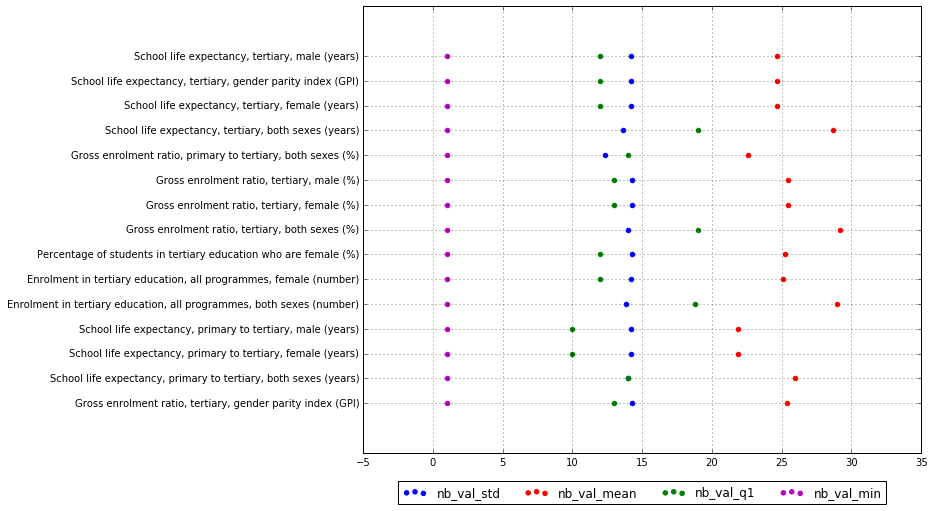

In [45]:
series_filter = series.loc[(series['nb_val_q1']>0)
           &(series['nb_country']>200)
           &(series['Topic']=="Tertiary")
           &(series['nb_val_mean']>20)]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

In [46]:
indicator_name_array = np.hstack((indicator_name_array,
                        "Enrolment in tertiary education, all programmes, both sexes (number)"))

## Teachers (1)

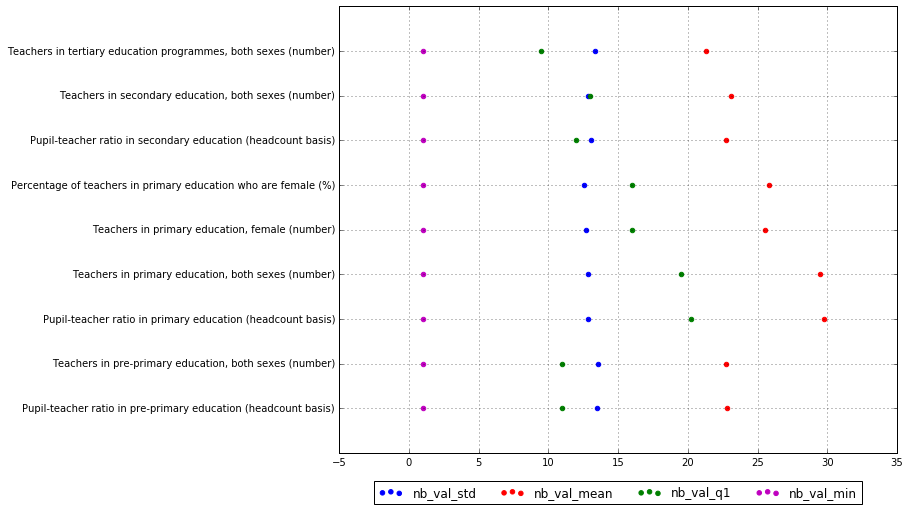

In [47]:
series_filter = series.loc[(series['nb_val_q1']>0)
           &(series['nb_country']>150)
           &(series['Topic']=="Teachers")
           &(series['nb_val_mean']>20)]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

In [48]:
indicator_name_array = np.hstack((indicator_name_array,
                        "Pupil-teacher ratio in secondary education (headcount basis)"))

## Population (3)

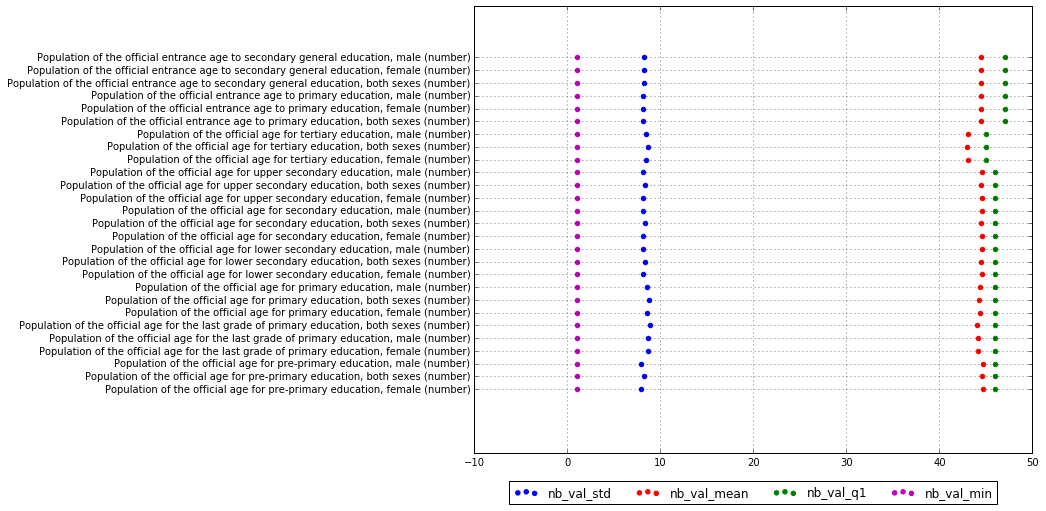

In [49]:
series_filter = series.loc[(series['nb_val_q1']>20)
           &(series['nb_country']>200)
           &(series['Topic']=="Population")
           &(series['nb_val_mean']>20)]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

In [50]:
indicator_name_array = np.hstack((indicator_name_array,
                        "Population of the official age for tertiary education, both sexes (number)",
                        "Population of the official age for upper secondary education, both sexes (number)",
                        "Population of the official age for secondary education, both sexes (number)"))

## Health: Population: Structure (0)

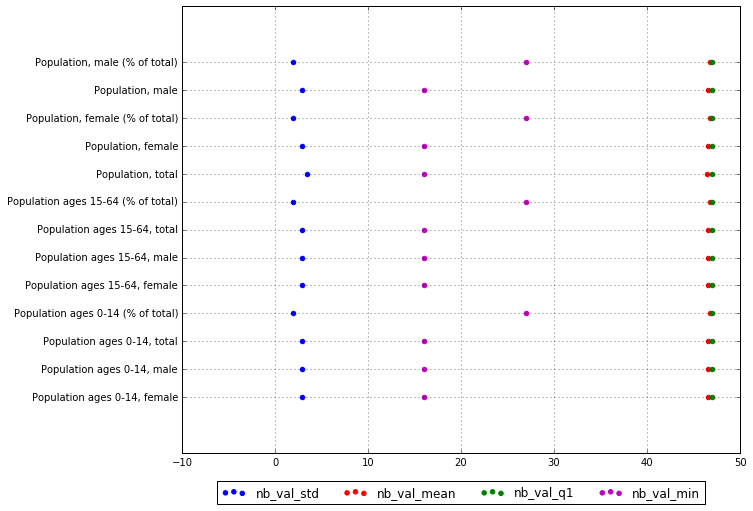

In [51]:
series_filter = series.loc[(series['nb_val_q1']>20)
           &(series['nb_country']>200)
           &(series['Topic']=="Health: Population: Structure")
           &(series['nb_val_mean']>20)]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

## Attainment (3)

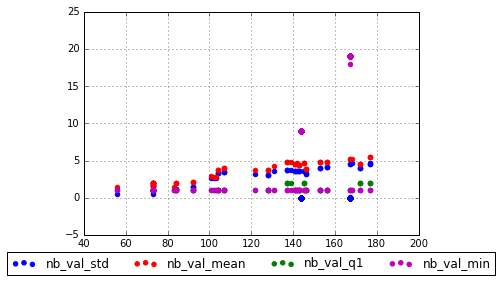

In [52]:
series_filter = series.loc[series['Topic']=="Attainment"]
plot_series_country(series_filter, ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'])

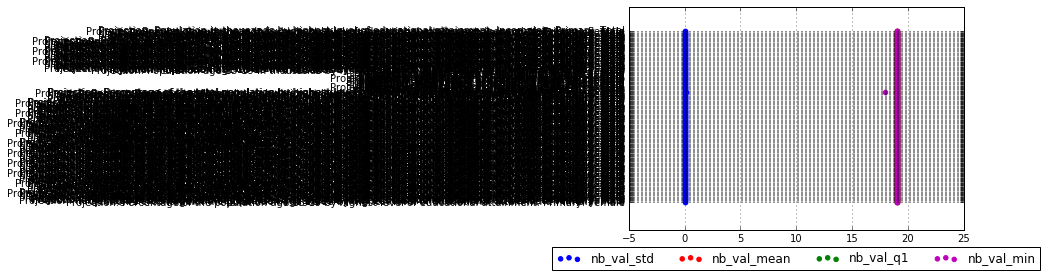

In [53]:
series_filter = series.loc[(series['nb_val_q1']>0)
           &(series['nb_country']>150)
           &(series['Topic']=="Attainment")
           &(series['nb_val_mean']>15)]
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

In [54]:
series_filter['Indicator Name'].unique()

array([ 'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Female',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Male',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Total',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Female',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Male',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Female',
       'Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Male',

In [55]:
indicator_name_array = np.hstack((indicator_name_array,
                        "Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total",
                        "Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total",
                        "Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total"))

## Expenditures (2)

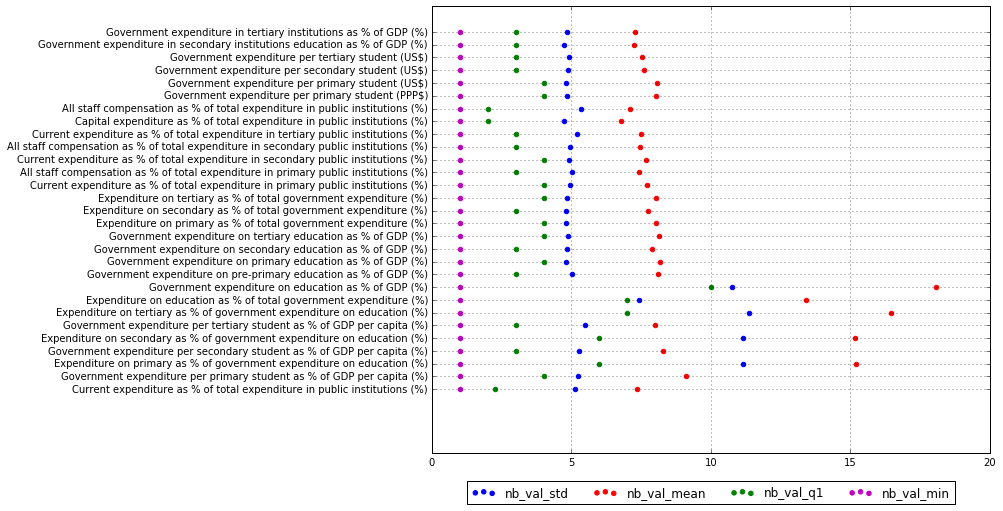

In [56]:
series_filter = series.loc[(series['nb_val_q1']>0)
           &(series['nb_country']>150)
           &(series['Topic']=="Expenditures")
           &(series['nb_val_mean']>0)]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

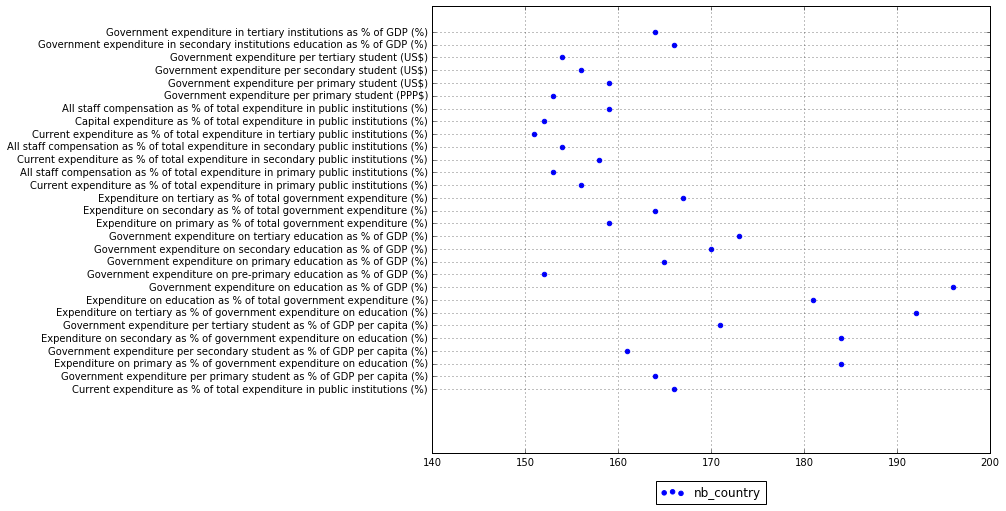

In [57]:
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_country'],
                 [])

In [58]:
series_filter['Indicator Name'].values

array([ 'Current expenditure as % of total expenditure in public institutions (%)',
       'Government expenditure per primary student as % of GDP per capita (%)',
       'Expenditure on primary as % of government expenditure on education (%)',
       'Government expenditure per secondary student as % of GDP per capita (%)',
       'Expenditure on secondary as % of government expenditure on education (%)',
       'Government expenditure per tertiary student as % of GDP per capita (%)',
       'Expenditure on tertiary as % of government expenditure on education (%)',
       'Expenditure on education as % of total government expenditure (%)',
       'Government expenditure on education as % of GDP (%)',
       'Government expenditure on pre-primary education as % of GDP (%)',
       'Government expenditure on primary education as % of GDP (%)',
       'Government expenditure on secondary education as % of GDP (%)',
       'Government expenditure on tertiary education as % of GDP (%)',
  

In [59]:
indicator_name_array = np.hstack((indicator_name_array,
                        "Government expenditure on education as % of GDP (%)",
                        "Expenditure on tertiary as % of government expenditure on education (%)"))

## Other (3)

In [60]:
series_topic150.iloc[-10:]['Value_count'].sum()

32

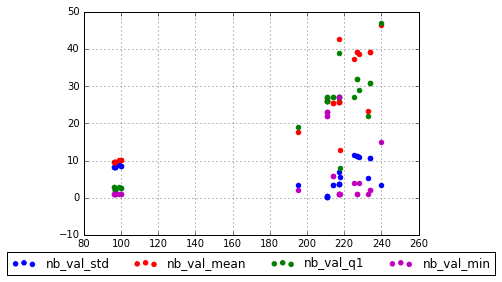

In [61]:
series_filter = series.loc[series['Topic'].isin(series_topic150.iloc[-10:]['Topic'])]
plot_series_country(series_filter, ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'])

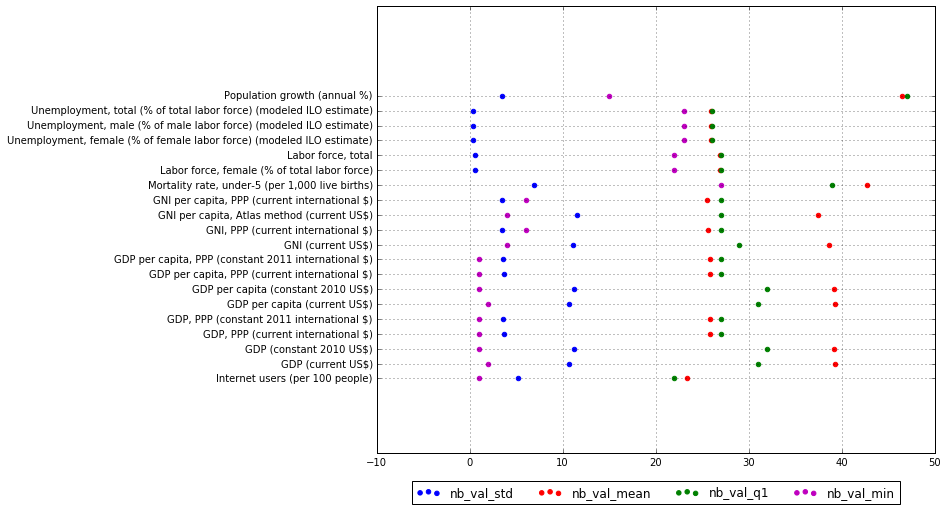

In [62]:
series_filter = series.loc[(series['nb_val_mean']>20)&
                                 (series['nb_country']>200)&
                                 (series['Topic'].isin(series_topic150.iloc[-10:]['Topic']))]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

In [63]:
indicator_name_array = np.hstack((indicator_name_array,
                        "Population growth (annual %)",
                        "GNI per capita, PPP (current international $)",
                        "Internet users (per 100 people)"))

## Résumé

In [64]:
indicator_name_array.shape

(15,)

In [65]:
series_selected = series.loc[series['Indicator Name'].isin(indicator_name_array)]
series_selected.shape

(15, 22)

In [66]:
series_selected['Topic'].value_counts()

Population                                         3
Attainment                                         3
Expenditures                                       2
Secondary                                          2
Infrastructure: Communications                     1
Economic Policy & Debt: Purchasing power parity    1
Teachers                                           1
Tertiary                                           1
Health: Population: Dynamics                       1
Name: Topic, dtype: int64

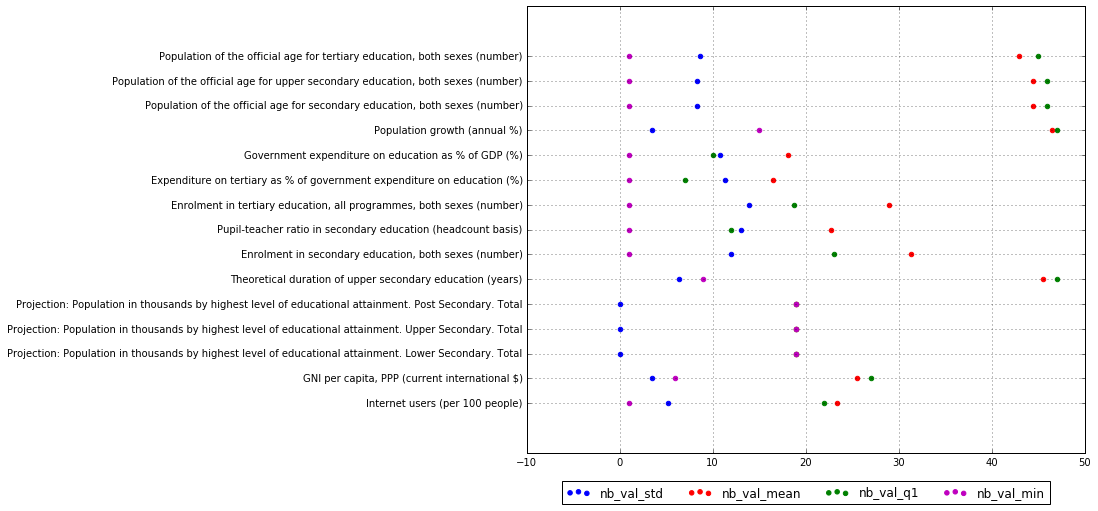

In [67]:
plt.figure(figsize=(10,8))
plot_series_stat(series_selected,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

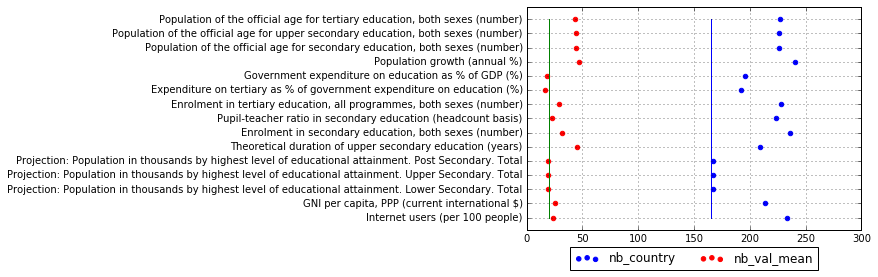

In [68]:
plot_series_stat(series_selected,
                 'Indicator Name',
                 ['nb_country','nb_val_mean'],[165, 20])

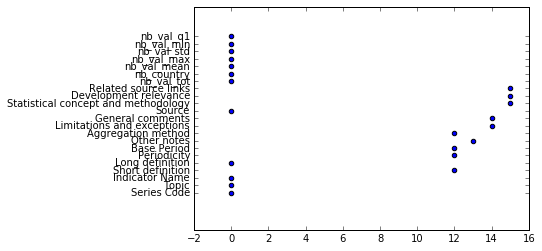

In [69]:
plt.scatter(series_selected.isnull().sum().values, np.arange(len(series_selected.isnull().sum().index.values)))
plt.yticks(np.arange(len(series_selected.isnull().sum().index.values)), series_selected.isnull().sum().index.values)
#plt.plot(series_dim[0]*np.ones(((series_dim[1],1))), np.arange(len(series.isnull().sum().index.values)))
plt.show()

In [70]:
print("Nombre de lignes du dataframe series_selected : %i"%series_selected.shape[0])
series_selected.isnull().sum()

Nombre de lignes du dataframe series_selected : 15


Series Code                             0
Topic                                   0
Indicator Name                          0
Short definition                       12
Long definition                         0
Periodicity                            12
Base Period                            12
Other notes                            13
Aggregation method                     12
Limitations and exceptions             14
General comments                       14
Source                                  0
Statistical concept and methodology    15
Development relevance                  15
Related source links                   15
nb_val_tot                              0
nb_country                              0
nb_val_mean                             0
nb_val_max                              0
nb_val_std                              0
nb_val_min                              0
nb_val_q1                               0
dtype: int64

In [71]:
series_selected = series_selected.drop(
    ['Short definition',
     'Periodicity',
     'Base Period',
     'Statistical concept and methodology',
     'Development relevance',
     'Related source links'],
    axis=1)

In [72]:
print("Nombre de lignes du dataframe series_selected : %i"%series_selected.shape[0])
series_selected.isnull().sum()

Nombre de lignes du dataframe series_selected : 15


Series Code                    0
Topic                          0
Indicator Name                 0
Long definition                0
Other notes                   13
Aggregation method            12
Limitations and exceptions    14
General comments              14
Source                         0
nb_val_tot                     0
nb_country                     0
nb_val_mean                    0
nb_val_max                     0
nb_val_std                     0
nb_val_min                     0
nb_val_q1                      0
dtype: int64

In [73]:
data_selected = data.loc[(data['Indicator Code'].isin(series_selected['Series Code']))&(data['nb_val'] > 0)]
data_selected.shape

(3151, 70)

In [74]:
country['nb_series_selected'] = country.apply(
    lambda row:len(data_selected.loc[data_selected['Country Code'] == row[0], 'nb_val']), axis=1)

In [75]:
country['nb_val_selected'] = country.apply(
    lambda row:data_selected.loc[data_selected['Country Code'] == row[0], 'nb_val'].sum(), axis=1)

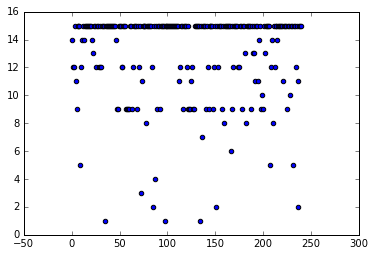

In [76]:
plt.scatter(country.index.values, country['nb_series_selected'])

In [77]:
country_selected = country.loc[country['nb_series_selected'] == 15]
country_selected.shape

(150, 33)

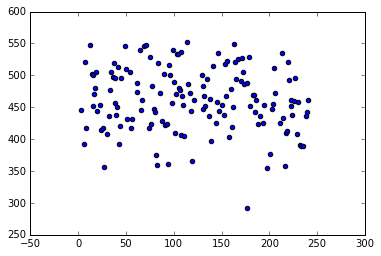

In [78]:
plt.scatter(country_selected.index.values, country_selected['nb_val_selected'])

In [79]:
country_selected.loc[country_selected['nb_val_selected']<350]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,nb_series_selected,nb_val_selected
177,PRI,Puerto Rico,Puerto Rico,Puerto Rico,PR,U.S. dollar,Fiscal year end: June 30; reporting period for...,Latin America & Caribbean,High income: nonOECD,PR,...,2010,"Reproductive Health Survey (RHS), 1995/96",NaN,Yes,2007,2006.0,NaN,2005,15,292


In [80]:
country_selected = country_selected.loc[country['nb_val_selected'] > 350]
country_selected.shape

(149, 33)

In [81]:
country_selected['Region'].value_counts()

Europe & Central Asia         43
Sub-Saharan Africa            39
Latin America & Caribbean     25
East Asia & Pacific           19
Middle East & North Africa    15
South Asia                     6
North America                  2
Name: Region, dtype: int64

In [82]:
country['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [83]:
print("ratio de pays conservés")
for string in country['Region'].value_counts().index:
    print('{} : {}'.format(string, country_selected['Region'].value_counts()[string]/country['Region'].value_counts()[string]))

ratio de pays conservés
Europe & Central Asia : 0.7543859649122807
Sub-Saharan Africa : 0.8125
Latin America & Caribbean : 0.6097560975609756
East Asia & Pacific : 0.5277777777777778
Middle East & North Africa : 0.7142857142857143
South Asia : 0.75
North America : 0.6666666666666666


In [84]:
data_selected_country = data_selected.loc[data_selected['Country Code'].isin(country_selected['Country Code'])]
data_selected_country.shape

(2235, 70)

In [85]:
data_selected_country['Indicator Code'].value_counts()

PRJ.POP.ALL.2.MF     149
SP.TER.TOTL.IN       149
SE.SEC.DURS.UP       149
PRJ.POP.ALL.4.MF     149
IT.NET.USER.P2       149
SP.POP.GROW          149
SE.XPD.TERT.ZS       149
SP.SEC.TOTL.IN       149
NY.GNP.PCAP.PP.CD    149
SE.SEC.ENRL.TC.ZS    149
SE.SEC.ENRL          149
SE.XPD.TOTL.GD.ZS    149
PRJ.POP.ALL.3.MF     149
SE.TER.ENRL          149
SP.SEC.UTOT.IN       149
Name: Indicator Code, dtype: int64

In [86]:
data_years = [int(numeric_string) for numeric_string in data.columns[4:-1].values]

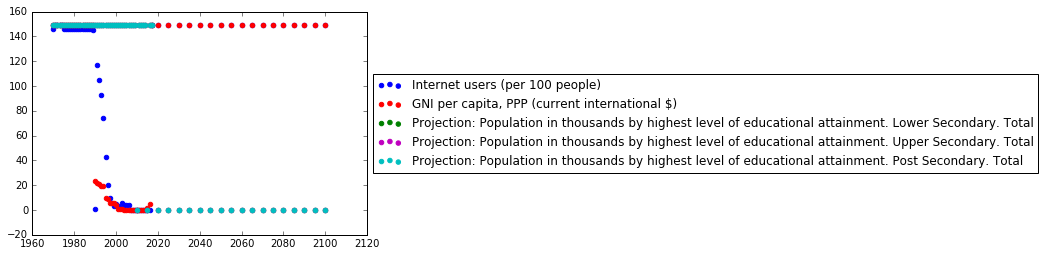

In [87]:
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(5):
    plt.scatter(data_years,
            data_selected_country.loc[data_selected_country['Indicator Code']==series_selected['Series Code'].iloc[i]].iloc[:,4:-1].isnull().sum(),
               color = colors[i], label = series_selected['Indicator Name'].iloc[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

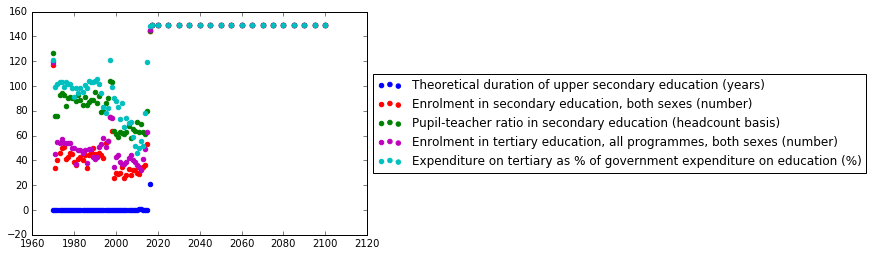

In [88]:
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(5):
    plt.scatter(data_years,
            data_selected_country.loc[data_selected_country['Indicator Code']==series_selected['Series Code'].iloc[5+i]].iloc[:,4:-1].isnull().sum(),
               color = colors[i], label = series_selected['Indicator Name'].iloc[5+i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

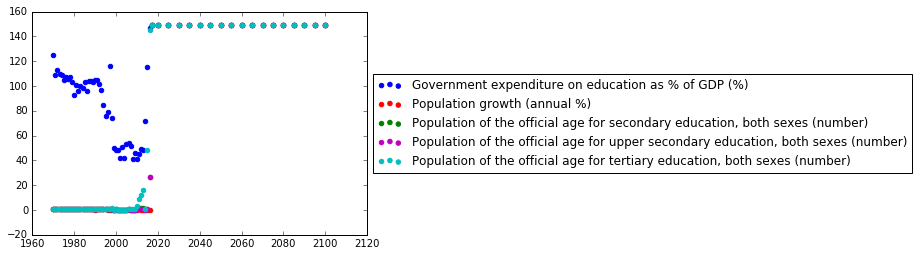

In [89]:
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(5):
    plt.scatter(data_years,
            data_selected_country.loc[data_selected_country['Indicator Code']==series_selected['Series Code'].iloc[10+i]].iloc[:,4:-1].isnull().sum(),
               color = colors[i], label = series_selected['Indicator Name'].iloc[10+i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [90]:
series_selected['Indicator Name'].values

array(['Internet users (per 100 people)',
       'GNI per capita, PPP (current international $)',
       'Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total',
       'Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
       'Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total',
       'Theoretical duration of upper secondary education (years)',
       'Enrolment in secondary education, both sexes (number)',
       'Pupil-teacher ratio in secondary education (headcount basis)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Expenditure on tertiary as % of government expenditure on education (%)',
       'Government expenditure on education as % of GDP (%)',
       'Population growth (annual %)',
       'Population of the official age for secondary education, both sexes (number)',
       'Popul

In [91]:
indicator_name_def = ['Internet users (per 100 people)',
                      'GNI per capita, PPP (current international $)',
                      'Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total',
                      'Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
                      'Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total',
                      'Theoretical duration of upper secondary education (years)',
                      'Population growth (annual %)',
                      'Population of the official age for secondary education, both sexes (number)',
                      'Population of the official age for upper secondary education, both sexes (number)',
                      'Population of the official age for tertiary education, both sexes (number)']

In [92]:
indicator_name_progress = ['Enrolment in secondary education, both sexes (number)',
       'Pupil-teacher ratio in secondary education (headcount basis)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Expenditure on tertiary as % of government expenditure on education (%)',
       'Government expenditure on education as % of GDP (%)']

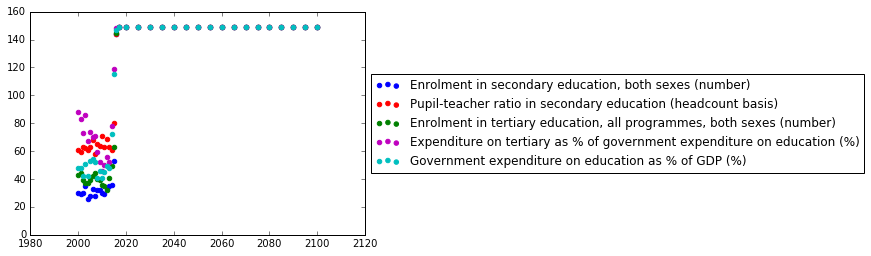

In [206]:
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(5):
    plt.scatter(data_years,
            data_selected_country.loc[data_selected_country['Indicator Name']==indicator_name_progress[i]].iloc[:,4:-1].isnull().sum(),
               color = colors[i], label = indicator_name_progress[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [166]:
data_selected_country = data_selected_country.drop([str(i) for i in range(1970, 2000)], axis=1)

In [187]:
data_years = [int(numeric_string) for numeric_string in data_selected_country.columns[4:-1].values]

In [167]:
data_selected_country['nb_val'] = data_selected_country.apply(lambda row:len(row[4:])-row[4:].isnull().sum(), axis = 1)

In [168]:
country_selected = country_selected.reset_index(drop=True)
country_selected.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Latest industrial data,Latest trade data,Latest water withdrawal data,nb_series_selected,nb_val_selected,nb_val_INP0,nb_val_INP1,nb_val_INP2,nb_val_INP3,nb_val_INP4
0,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,2010.0,2012.0,2006,15,446,39,12,37,2,15
1,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,NaN,2011.0,2005,15,392,27,20,25,1,1
2,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,2002.0,2012.0,2000,15,521,41,27,37,36,36
3,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,NaN,2012.0,2007,15,417,21,3,29,9,18
4,AUT,Austria,Austria,Republic of Austria,AT,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,AT,...,2009.0,2012.0,2002,15,547,37,34,45,43,43


In [169]:
country_selected['nb_val_INP0'] = country_selected.apply(
    lambda row:data_selected_country.loc[(data_selected_country['Country Code'] == row[0])&
                                         (data_selected_country['Indicator Name'] == indicator_name_progress[0]),
                                         'nb_val'].sum(), axis=1)

In [170]:
country_selected['nb_val_INP1'] = country_selected.apply(
    lambda row:data_selected_country.loc[(data_selected_country['Country Code'] == row[0])&
                                         (data_selected_country['Indicator Name'] == indicator_name_progress[1]),
                                         'nb_val'].sum(), axis=1)

In [171]:
country_selected['nb_val_INP2'] = country_selected.apply(
    lambda row:data_selected_country.loc[(data_selected_country['Country Code'] == row[0])&
                                         (data_selected_country['Indicator Name'] == indicator_name_progress[2]),
                                         'nb_val'].sum(), axis=1)

In [172]:
country_selected['nb_val_INP3'] = country_selected.apply(
    lambda row:data_selected_country.loc[(data_selected_country['Country Code'] == row[0])&
                                         (data_selected_country['Indicator Name'] == indicator_name_progress[3]),
                                         'nb_val'].sum(), axis=1)

In [173]:
country_selected['nb_val_INP4'] = country_selected.apply(
    lambda row:data_selected_country.loc[(data_selected_country['Country Code'] == row[0])&
                                         (data_selected_country['Indicator Name'] == indicator_name_progress[4]),
                                         'nb_val'].sum(), axis=1)

In [190]:
country_selected_INP10 = country_selected.loc[(country_selected['nb_val_INP0']<10)|
                                             (country_selected['nb_val_INP1']<10)|
                                             (country_selected['nb_val_INP2']<10)|
                                             (country_selected['nb_val_INP3']<10)|
                                             (country_selected['nb_val_INP4']<10)]

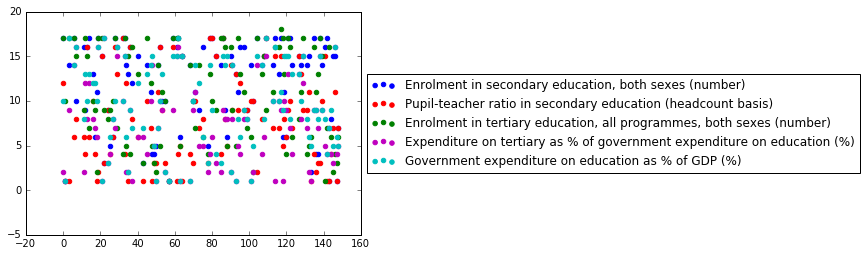

In [191]:
plt.scatter(country_selected_INP10.index.values, country_selected_INP10['nb_val_INP0'], color='b', label = indicator_name_progress[0])
plt.scatter(country_selected_INP10.index.values, country_selected_INP10['nb_val_INP1'], color='r', label = indicator_name_progress[1])
plt.scatter(country_selected_INP10.index.values, country_selected_INP10['nb_val_INP2'], color='g', label = indicator_name_progress[2])
plt.scatter(country_selected_INP10.index.values, country_selected_INP10['nb_val_INP3'], color='m', label = indicator_name_progress[3])
plt.scatter(country_selected_INP10.index.values, country_selected_INP10['nb_val_INP4'], color='c', label = indicator_name_progress[4])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [192]:
len(country_selected_INP10.index)

98

In [193]:
country_selected_INP10['Region'].value_counts()

Sub-Saharan Africa            33
Europe & Central Asia         20
Latin America & Caribbean     19
East Asia & Pacific           11
Middle East & North Africa    11
South Asia                     3
North America                  1
Name: Region, dtype: int64

In [195]:
country_selected_def = country_selected.loc[(country_selected['nb_val_INP0']>10)&
                                             (country_selected['nb_val_INP1']>10)&
                                             (country_selected['nb_val_INP2']>10)&
                                             (country_selected['nb_val_INP3']>10)&
                                             (country_selected['nb_val_INP4']>10)]

In [196]:
len(country_selected_def)

43

In [197]:
country_selected_def['Region'].value_counts()

Europe & Central Asia         21
East Asia & Pacific            6
Latin America & Caribbean      5
Sub-Saharan Africa             4
South Asia                     3
Middle East & North Africa     3
North America                  1
Name: Region, dtype: int64

In [198]:
print("ratio de pays conservés")
for string in country['Region'].value_counts().index:
    print('{} : {}'.format(string, country_selected_def['Region'].value_counts()[string]/country['Region'].value_counts()[string]))

ratio de pays conservés
Europe & Central Asia : 0.3684210526315789
Sub-Saharan Africa : 0.08333333333333333
Latin America & Caribbean : 0.12195121951219512
East Asia & Pacific : 0.16666666666666666
Middle East & North Africa : 0.14285714285714285
South Asia : 0.375
North America : 0.3333333333333333


In [199]:
data_selected_country_def = data_selected_country.loc[data_selected_country['Country Code'].isin(country_selected_def['Country Code'])]

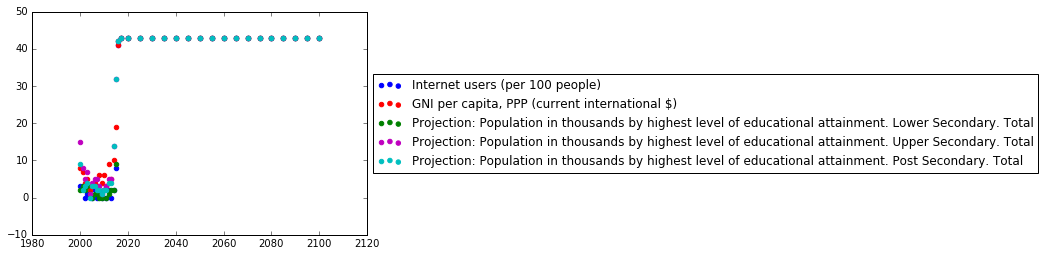

In [200]:
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(5):
    plt.scatter(data_years,
            data_selected_country_def.loc[data_selected_country_def['Indicator Name']==indicator_name_progress[i]].iloc[:,4:-1].isnull().sum(),
               color = colors[i], label = series_selected['Indicator Name'].iloc[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

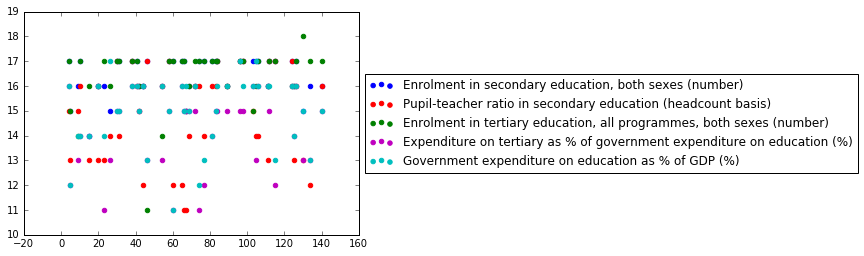

In [201]:
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP0'], color='b', label = indicator_name_progress[0])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP1'], color='r', label = indicator_name_progress[1])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP2'], color='g', label = indicator_name_progress[2])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP3'], color='m', label = indicator_name_progress[3])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP4'], color='c', label = indicator_name_progress[4])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [203]:
data_test = data_selected_country_def.loc[(data_selected_country_def['Indicator Name'] == 'Expenditure on tertiary as % of government expenditure on education (%)')&
                                 (data_selected_country_def['nb_val']>15)]
data_test

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,nb_val
133178,Austria,AUT,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,25.009689,23.641809,22.571159,23.519800,26.121330,27.282770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
239463,Chile,CHL,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,14.534640,NaN,14.027410,13.151200,15.117400,13.965760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
334753,Finland,FIN,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,34.030430,32.942242,32.474781,32.031570,32.201370,31.810181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
437373,Israel,ISR,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,18.301880,17.859591,16.713381,18.467070,16.467649,16.565781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
602298,Netherlands,NLD,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,28.017281,26.829041,25.832479,26.185289,26.590120,26.773970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
609628,New Zealand,NZL,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,NaN,24.667330,26.212940,24.866989,24.374331,23.142870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
660938,Poland,POL,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,14.463340,15.693970,19.454149,19.142250,21.230721,21.760880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
723243,Slovak Republic,SVK,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,18.372919,20.529190,20.160120,19.657360,23.412230,21.001329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
745233,Spain,ESP,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,21.789370,22.804819,22.842190,23.218639,22.894199,22.365459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
778218,Sweden,SWE,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,27.183281,28.031000,28.320681,28.867760,28.461809,27.507500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


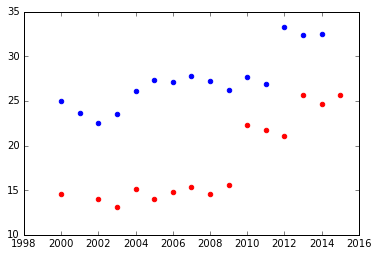

In [204]:
plt.scatter(data_years, data_test.iloc[0,4:-1], color='b')
plt.scatter(data_years, data_test.iloc[1,4:-1], color='r')
plt.show()

In [111]:
plt.scatter([int(numeric_string) for numeric_string in data_selected_country.iloc[:,4:-1].columns],
            data_selected_country_indicatorTest.iloc[:,4:-1].isnull().sum())

NameError: name 'data_selected_country_indicatorTest' is not defined

### Valeurs dupliquées

In [ ]:
print("Valeurs dupliquées DF country ('Country Code') : %i"%country['Country Code'].duplicated().sum())
print("Valeurs dupliquées DF series ('Series Code') : %i"%series['Series Code'].duplicated().sum())


In [ ]:
series['Topic'].value_counts()

In [ ]:
series['Unit of measure'].unique()

In [ ]:
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_std'])
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_mean'],
            color='red')
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_q1'],
            color='green')
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_min'],
            color='orange')

In [ ]:
plt.scatter(series['nb_country'], series['nb_val_max'])
plt.scatter(series['nb_country'], series['nb_val_mean'], color='red')
plt.xlim(220, 250)
plt.ylim(30,50)

In [ ]:
plt.scatter(series['nb_val_mean'], series['nb_val_std']/25)
plt.scatter(series['nb_val_mean'], series['nb_country']/245, color='red')

In [ ]:
series.loc[(series['nb_country']>230) & (series['nb_val_mean']>30), 'Topic']

In [ ]:
plt.scatter(series.loc[series['nb_val_std']<10, 'nb_country'], series.loc[series['nb_val_std']<10, 'nb_val_std'])
plt.scatter(series.loc[series['nb_val_std']<10, 'nb_country'], series.loc[series['nb_val_std']<10, 'nb_val_mean'], color='red')

In [ ]:
plt.scatter(series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_country'],
            series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_val_std'])
plt.scatter(series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_country'],
            series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_val_mean'],
            color='red')

In [ ]:
series.loc[(series['nb_val_std']<10)&(series['nb_country']>200)&(series['nb_val_mean']>20), 'Topic'].value_counts()

In [ ]:
series['Topic'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(country.isnull().sum().values, np.arange(len(country.isnull().sum().index.values)))
plt.yticks(np.arange(len(country.isnull().sum().index.values)), country.isnull().sum().index.values)
plt.plot(country_dim[0]*np.ones(((country_dim[1],1))), np.arange(len(country.isnull().sum().index.values)))
plt.show()